### Consider the IRIS dataset in sklearn

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from numpy import linalg as LA

### Find the 3 linear discriminant functions of Logistic regresstion method

Note that you might need to reformulate the class labels 0, 1, 2 in iris.target to (1, 0, 0), (0, 1, 0), (0, 0, 1) as following

In [2]:
iris = datasets.load_iris()
Y_old = iris.target   # original class labels of 0, 1, 2
Y_new = np.zeros([len(Y_old), 3])  # store new labels
for i in range(len(Y_old)):
    if Y_old[i] == 0:
        Y_new[i,:] = [1, 0, 0]
    elif Y_old[i] == 1:
        Y_new[i,:] = [0, 1, 0]
    else:
        Y_new[i,:] = [0, 0, 1]

In [3]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
Y_old

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Training Multi-class Logistic Regression

Fist we review the Multi-class Logistic Regression methods

+ Given $\{x_n, y_n\}$, where $x_n \in R^d$ and 
$y_n \in \{(1,\cdots,0)^T, \cdots, (0, \cdots, 1)^T\}$ for $1 \leq n \leq N$
+ Let $p_{n,j} = P(c_{j}|x_{n}) = \frac{e^{f_{j}(x_{n})}}{\sum_{l+1}^{L}e^{f_{l}(x_{n})}}$, for $1 \leq j \leq L$ and $1 \leq n \leq N$, where $f_{l}(x) = w_{l}^{T} \widetilde{x} $
+ Let 
\begin{equation}
W = \begin{bmatrix}
w_1^T\\
\vdots\\
w_{L}^{T}
\end{bmatrix}
,
X = \begin{bmatrix}
\widetilde{x}_1^T\\
\vdots\\
\widetilde{x}_N^T
\end{bmatrix}
, P=[p_{n,j}]_{n=1,j=1}^{N,L}
,
Y = \begin{bmatrix}
y_{1}^T\\
\vdots\\
y_{N}^T
\end{bmatrix}
\end{equation}
+ Likelihood $p(Y|W) = \Pi_{n=1}^{N}p(y_n|W) = \Pi_{n=1}^{N}\Pi_{j=1}^{L}p_{j,n}^{y_{n,j}}$
+ $\displaystyle\mathop{argmax}_{w} \ P(Y|W) = \displaystyle \mathop{argmin}_{w} \ -\ln p(Y|W) = \displaystyle \mathop{argmin}_{w}\ \sum\limits_{n=1}^{N}\sum\limits_{j=1}^{L}  -y_{n,j} \ln p_{n,j}$



### Gradient Descent

we use gradient descent to solve the optimization problem

+ Let $F(W) = \sum\limits_{n=1}^{N}\sum\limits_{j=1}^{L}  -y_{n,j} \ ln p_{n,j}$
+ $\nabla F(W) = (P-Y)^{T}X$
+ Gradient descent: $W^{k+1} = W^{k} - \eta \nabla F(W^{k})$

In [15]:
X_data = iris.data
n,d = np.shape(X_data)
X = np.block([np.ones([n,1]), X_data])
L = 3
# initial parameter
W = np.zeros([L,d+1])
Y = Y_new
eta = 0.001 # learning rate
epision = 0.005    # stop condition

# compute the probability matrix
def prob(X, W):
    A = np.dot(X, W.T)
    P = np.exp(A)
    pp = np.sum(P, axis=1)
    for i in range(len(pp)):
        P[i,:] = P[i,:]/pp[i]
    return P

# use the gradient to find the parameter
P = prob(X,W)
dF = np.dot((P-Y).T, X)
dF_vals = []
k = 0
while LA.norm(dF) > epision:
    P = prob(X,W)
    dF = np.dot((P-Y).T, X)
    dF_vals.append(LA.norm(dF))
    W = W - eta * dF
    k = k+1
    if k > 100000:
        break


100001 100001


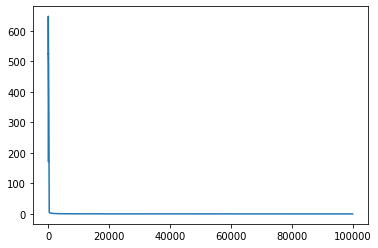

the parameter of the discriminant functions is [[  1.32408411   2.86139791   5.495632    -7.83060488  -3.97644163]
 [ 11.4503529    0.0413125   -0.11362962   0.28422366  -4.55064654]
 [-12.77443702  -2.90271041  -5.38200237   7.54638122   8.52708817]] 
 the number of the iteration is 100001


In [16]:
print(len(dF_vals), k)
plt.plot(range(k), dF_vals)
plt.show()
print("the parameter of the discriminant functions is", W, "\n", "the number of the iteration is", k)

In [17]:
print(LA.norm(dF))

0.06918595876696891


In this project, it is difficult of find a proper learning rate, and the convergent is very slow.

In [18]:
# we need to compute the right rate of the pridiction
P = prob(X, W)
n = np.shape(P)[0]
L = 0       # the right pridiction
for i in range(n):
    k = np.argmax(P[i,:])
    if k==0:
        P[i,:] = [1,0,0]
    elif k==1:
        P[i,:] = [0,1,0]
    else:
        P[i,:] = [0,0,1]
    if (P[i,:] == Y[i,:]).all():
        L = L+1
right_rate = L/n
print("the right rate of the pridiction:", right_rate)

the right rate of the pridiction: 0.9866666666666667
